Đa hồi quy (Multiple linear regression) có dạng như sau:
$$y=f(x_1,x_2,...,x_n)=w_0+w_1x_1+w_2x_2+...+w_nx_n$$
Tức là có nhiều hơn 1 biến độc lập trong tham số.

# Ví dụ 1
Sử dụng thư viện `statsmodels.formula.api` để tìm mô hình đa hồi quy

In [ ]:
# Tải các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Cài đặt đồ thị
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams["font.family"] = 'DejaVu Sans'
plt.rcParams["font.size"] = '12'

In [ ]:
# Tải dữ liệu và in tóm tắt dữ liệu ra màn hình
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(data)

       longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
...          ...       ...  ...            ...                 ...
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[17000 rows x 9 columns]


In [ ]:
# Lấy các thuộc tính (đặc trưng) và giá trị y
# Ghi theo thứ tự sau: "y ~ x_1 + x_2 + ... + x_n"
formula = 'median_house_value ~ total_rooms + total_bedrooms'
# Tạo mô hình dựa trên các đặc trưng trên
lm = smf.ols(formula = formula, data = data).fit()
# In các hệ số (độ dốc) của mô hình
print(lm.params)

print("R²: " + str(lm.rsquared))

Intercept         198676.578237
total_rooms           34.098463
total_bedrooms      -151.128892
dtype: float64
R²: 0.058806108909388866


In [ ]:
# Hàm số f(x)
def f(rooms, bedrooms):
    coeff_intercept = lm.params[0]
    coeff_rooms = lm.params[1]
    coeff_bedrooms = lm.params[2]
    return coeff_intercept + rooms * coeff_rooms + bedrooms * coeff_bedrooms

In [ ]:
# Vẽ đồ thị 3D
def Graph3D():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    result = []
    for index, row in data[:1000].iterrows():
        result.append(f(row['total_rooms'], row['total_bedrooms']))
        ax.scatter(np.full(len(result), row['total_rooms']), result, c = result)
    ax.set_xlabel('Total rooms')
    ax.set_ylabel('Total bedrooms')
    ax.set_zlabel('Value')

    plt.show()

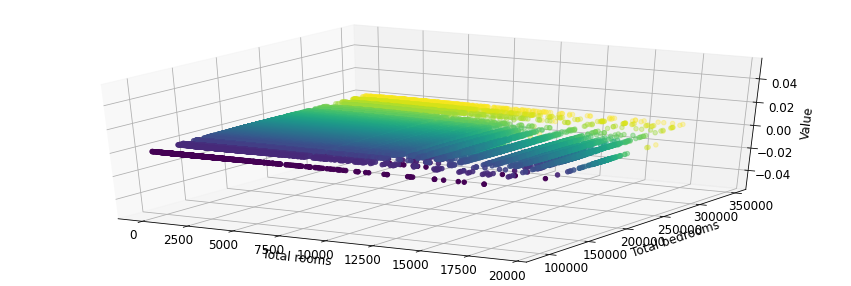

In [ ]:
Graph3D()

# Ví dụ 2
Sử dụng thư viện `sklearn` để tìm mô hình đa hồi quy

In [ ]:
# Tải các thư viện cần thiết
import pandas as pd
from sklearn import linear_model

In [ ]:
# Tải dữ liệu mẫu về và in ra 5 dòng đầu tiên
data = pd.read_csv('https://www.w3schools.com/python/cars.csv')
print(data.head())

          Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105


In [ ]:
# Lấy các thuộc tính làm đầu vào
X = data[['Weight', 'Volume']]
y = data['CO2']

In [ ]:
# Chọn mô hình và đauw dữ liệu vào
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# In ra các hệ số
print(lr.coef_)
print(lr.intercept_)

[0.00755095 0.00780526]
79.69471929115937


In [ ]:
def f(weight, volume):
    return lr.intercept_ + lr.coef_[0] * weight + lr.coef_[1] * volume

In [ ]:
# Giả sử xe có khối lượng 700, dung tích 1200 thì có nồng độ CO2 là bao nhiêu?
print(f(700, 1200))

94.3466914136664
